In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_csv("/content/bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df=df.drop(columns='duration',axis=1)

In [ ]:
#data is balanced
df["deposit"].value_counts()

,count
deposit,
no,5873
yes,5289


In [ ]:
df["deposit"]=df["deposit"].map({'yes':1,"no":0})

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,0


In [ ]:
x=df.drop(columns="deposit",axis=1)
y=df["deposit"]

In [ ]:
categorical_colum=x.select_dtypes(include=["object"]).columns
categorical_colum

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
x=pd.get_dummies(x,columns=categorical_colum,drop_first=True)

In [ ]:
x

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,1,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,2,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,1,-1,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11158,39,733,16,4,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
11159,32,29,19,2,-1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11160,43,0,8,2,172,5,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
std=StandardScaler()
x=std.fit_transform(x)

In [ ]:
x

array([[ 1.49150488,  0.25252514, -1.26574556, ..., -0.22481365,
        -0.32578241,  0.58362637],
       [ 1.23967567, -0.4599736 , -1.26574556, ..., -0.22481365,
        -0.32578241,  0.58362637],
       [-0.0194704 , -0.0801603 , -1.26574556, ..., -0.22481365,
        -0.32578241,  0.58362637],
       ...,
       [-0.77495804, -0.46493443,  0.39689074, ..., -0.22481365,
        -0.32578241,  0.58362637],
       [ 0.14841574, -0.47392593, -0.90946635, ..., -0.22481365,
        -0.32578241, -1.71342496],
       [-0.6070719 , -0.47392593, -0.79070662, ..., -0.22481365,
        -0.32578241,  0.58362637]])

In [ ]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(8929, 41)

In [ ]:
model=Sequential()
model.add(Dense(32,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss="binary_crossentropy",optimizer="SGD",metrics=["accuracy"])

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=150,batch_size=32,verbose=1)

Epoch 1/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5457 - loss: 0.7071 - val_accuracy: 0.6349 - val_loss: 0.6490
Epoch 2/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6346 - loss: 0.6438 - val_accuracy: 0.6573 - val_loss: 0.6256
Epoch 3/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6588 - loss: 0.6212 - val_accuracy: 0.6730 - val_loss: 0.6114
Epoch 4/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6836 - loss: 0.5971 - val_accuracy: 0.6842 - val_loss: 0.6029
Epoch 5/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6887 - loss: 0.5932 - val_accuracy: 0.6988 - val_loss: 0.5964
Epoch 6/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7038 - loss: 0.5790 - val_accuracy: 0.6943 - val_loss: 0.5949
Epoch 7/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6907 - loss: 0.5814 - val_accuracy: 0.7010 - val_loss: 0.5921
Epoch 8/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7061 - loss: 0.5709 - val_accu

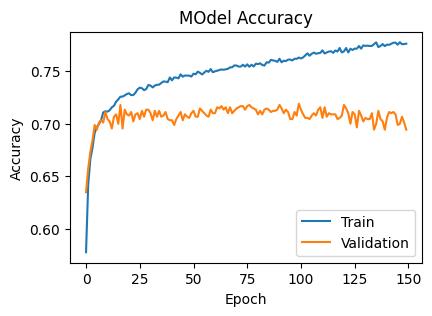

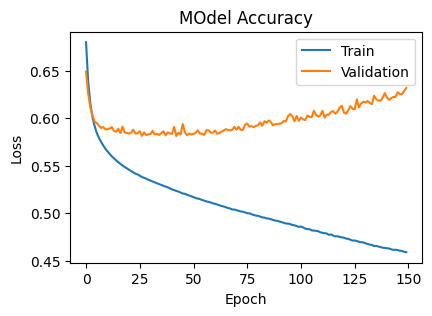

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MOdel Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])




plt.figure(figsize=(10,3))
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MOdel Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.show()